In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("Social_Network_Ads (1).csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [19]:
x=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values

In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
xtrain=sc_x.fit_transform(xtrain)
xtest=sc_x.fit_transform(xtest)
from sklearn.linear_model import LogisticRegression
c=LogisticRegression(random_state=0)
c.fit(xtrain,ytrain)
ypred=c.predict(xtest)
ypred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [8]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,ypred)
cm

array([[63,  5],
       [ 8, 24]], dtype=int64)

In [9]:
from sklearn import metrics
acc=metrics.accuracy_score(ytest,ypred)
acc

0.87

In [10]:
r_sens=metrics.recall_score(ytest,ypred,pos_label=1)
r_spec=metrics.recall_score(ytest,ypred,pos_label=0)
r_sens,r_spec

(0.75, 0.9264705882352942)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


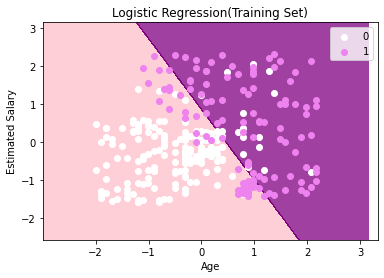

In [18]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
xs,ys=xtrain,ytrain
x1,x2=np.meshgrid(np.arange(start=xs[:,0].min()-1,stop=xs[:,0].max()+1,step=0.01),
               np.arange(start=xs[:,1].min()-1,stop=xs[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,c.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
                            alpha=0.75,cmap=ListedColormap(("pink","purple")))
plt.xlim(x1.min(),x2.max())
plt.ylim(x2.min(),x1.max())
for i,j in enumerate(np.unique(ys)):
    plt.scatter(xs[ys==j,0],xs[ys==j,1],
                c=ListedColormap(("white","violet"))(i),label=j)
plt.title("Logistic Regression(Training Set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()